In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [30]:
frequency_sampling, audio_signal = wavfile.read("audio_files\harvard.wav")
# frequency_sampling, audio_signal = wavfile.read("audio_files\jackhammer.wav")

C:\Users\sahit\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [31]:
print('\nSignal shape:', audio_signal.shape)
frequency_sampling


Signal shape: (809508, 2)


44100

In [32]:
print('Signal Datatype:', audio_signal.dtype)


Signal Datatype: int16


In [33]:
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')

Signal duration: 18.36 seconds


In [53]:
audio_signal = audio_signal / np.power(2, 15)
audio_signal = audio_signal [:100]
# audio_signal

In [35]:
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)


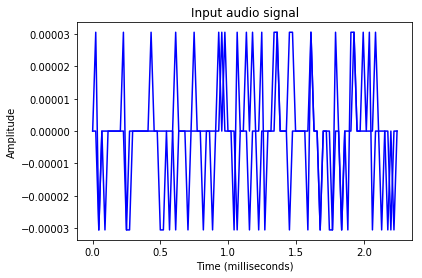

In [36]:
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

### Characterizing the Audio Signal: Transforming to Frequency Domain

Characterizing an audio signal involves converting the time domain signal into frequency domain, and understanding its frequency components, by. This is an important step because it gives a lot of information about the signal. You can use a mathematical tool like Fourier Transform to perform this transformation.

Example
The following example shows, step-by-step, how to characterize the signal, using Python, which is stored in a file. Note that here we are using Fourier Transform mathematical tool to convert it into frequency domain.

In [43]:
length_signal = len(audio_signal)
half_length = np.ceil((length_signal + 1) / 2.0).astype(np.int)
length_signal

100

Now, we need to apply mathematics tools for transforming into frequency domain. Here we are using the Fourier Transform.

In [38]:
signal_frequency = np.fft.fft(audio_signal)


In [41]:
signal_frequency = abs(signal_frequency[0:half_length])/length_signal
signal_frequency**=2

In [44]:
len_fts = len(signal_frequency)
len_fts

51

Note that the Fourier transformed signal must be adjusted for even as well as odd case.

In [46]:
if length_signal % 2:
    signal_frequency[1:len_fts]*=2
else:
    signal_frequency[1:len_fts-1] *=2

In [47]:
## Now, extract the power in decibal(dB) −

signal_power = 10 * np.log10(signal_frequency)



C:\Users\sahit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
# Adjust the frequency in kHz for X-axis −

x_axis = np.arange(0, len_fts, 1) * (frequency_sampling / length_signal) / 1000.0


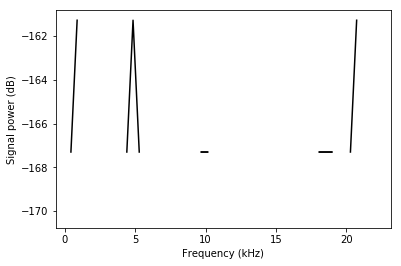

In [50]:
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

#### Feature Extraction from Speech
This is the most important step in building a speech recognizer because after converting the speech signal into the frequency domain, we must convert it into the usable form of feature vector. We can use different feature extraction techniques like MFCC, PLP, PLP-RASTA etc. for this purpose.

Example
In the following example, we are going to extract the features from signal, step-by-step, using Python, by using MFCC technique.

In [52]:
from python_speech_features import mfcc, logfbank


ModuleNotFoundError: No module named 'python_speech_features'